# Seasonal Decompose


## Omajinai

In [1]:
import pandas as pd

import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (12, 6)

import plotly.express as px
import plotly.io as pio
pio.renderers.default = "jupyterlab+svg"

In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

## Data

In [3]:
!wget https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv -O newly_confirmed_cases_daily.csv

--2022-04-05 22:28:50--  https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv
Resolving covid19.mhlw.go.jp (covid19.mhlw.go.jp)... 13.33.210.110, 13.33.210.11, 13.33.210.24, ...
Connecting to covid19.mhlw.go.jp (covid19.mhlw.go.jp)|13.33.210.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 114341 (112K) [application/octet-stream]
Saving to: ‘newly_confirmed_cases_daily.csv’

newly_confirmed_cas 100%[===================>] 111.66K   665KB/s    in 0.2s    

2022-04-05 22:28:50 (665 KB/s) - ‘newly_confirmed_cases_daily.csv’ saved [114341/114341]



In [4]:
df = pd.read_csv('newly_confirmed_cases_daily.csv', index_col=0)
df.index = pd.to_datetime(df.index)
print(df.shape)
df

(810, 48)


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-16,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,51795,2106,593,253,624,284,252,515,1463,740,...,272,154,2586,397,313,568,411,391,689,1132
2022-04-01,49152,2033,553,209,542,267,170,562,1362,632,...,261,136,2483,336,324,535,415,394,745,1125
2022-04-02,48703,1985,490,274,652,277,187,514,1284,660,...,284,138,2327,314,269,573,416,448,740,1173


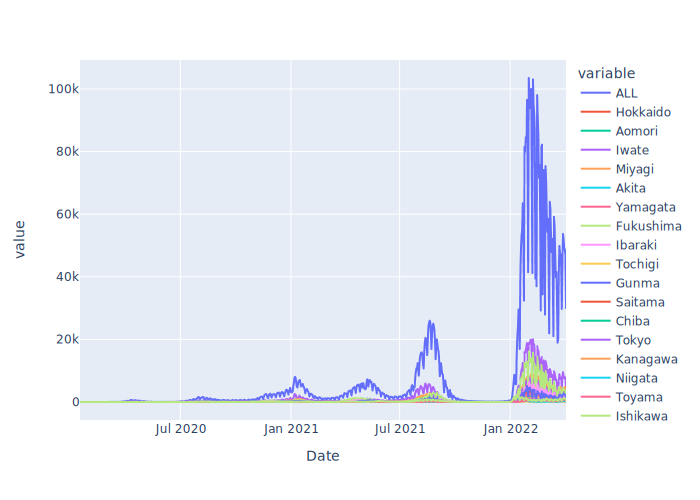

In [5]:
px.line(df, )

In [6]:
df_gr = df.groupby(pd.Grouper(level='Date', freq='W')).sum()
print(df_gr.shape)
display(df_gr.head(1))
display(df_gr.tail(1))

(117, 48)


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-19,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-10,30031,1577,250,149,282,148,103,363,1424,393,...,125,78,1561,293,145,344,250,300,322,508


### weekly

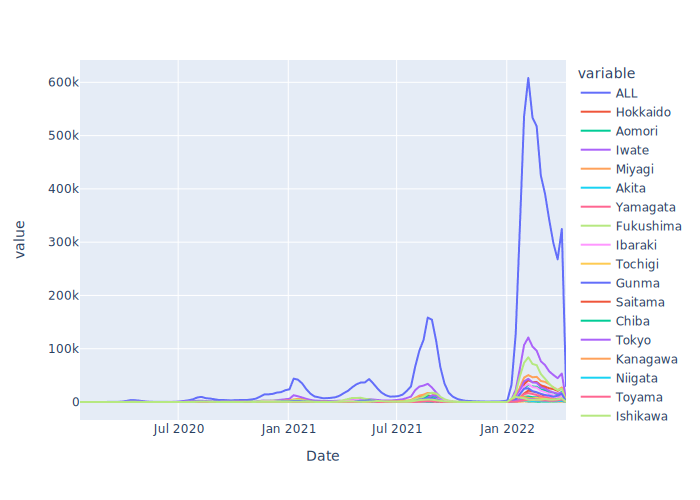

In [7]:
px.line(df_gr,)

## Decompose

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

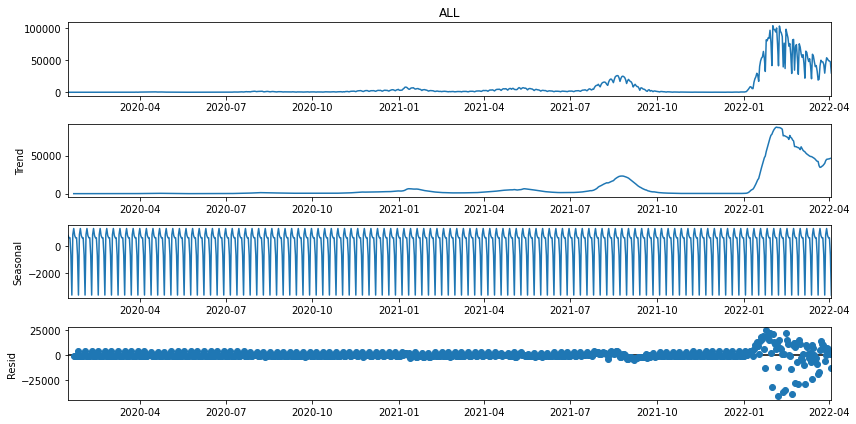

In [9]:
sd = seasonal_decompose(df.ALL, two_sided=False, )#period=7)
fig = sd.plot()

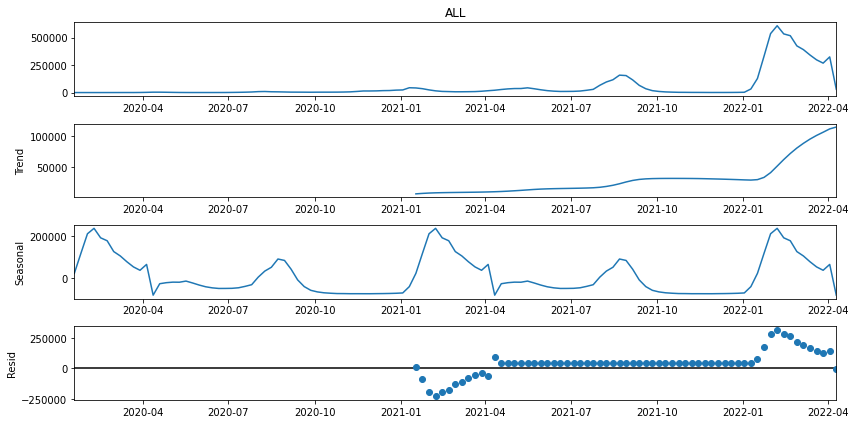

In [10]:
sd = seasonal_decompose(df_gr.ALL, two_sided=False, )#period=12)
fig = sd.plot()